# Biological Signals Analysis - Week 2 Homework

## Created by Guy Singer, January 11, 2024

------------------------------------------------------------------------------------------------------

## Math Exercises - Dirac's Delta and Discreet Fourier Transforms

The first portion of this homework assignment contains mathematics questions related to the topics covered this week (sampling in time and transformations into the frequency domain).
Please write your answers using the Jupyter markup cell’s LaTeX interpreter, or embed a scanned image/pdf of your answers into the markup cell.

More information about LaTeX and Jupyter markdown formatting can be found here:
[https://jupyterbook.org/en/stable/content/math.html](https://jupyterbook.org/en/stable/content/math.html)
And Here:
[https://ashki23.github.io/markdown-latex.html](https://ashki23.github.io/markdown-latex.html)

------------------------------------------------------------------------------------------------------

## Programming Exercises - Analyzing EEG Data

The following code cells contain the programming portion of this homework assignment. In this assignment, we will load an EEG signal, examine it, and record our obersvations. Then, we will transform the signal into the frequency domain using a Fourier Transform. Finally, we will write down our observations about the signal expressed in the frequency domain.

In [2]:
# Import dependencies
from scipy.io import loadmat
from pylab import *
from numpy import where
from numpy.fft import fft, rfft
from scipy.signal import spectrogram
rcParams['figure.figsize']=(12,3)

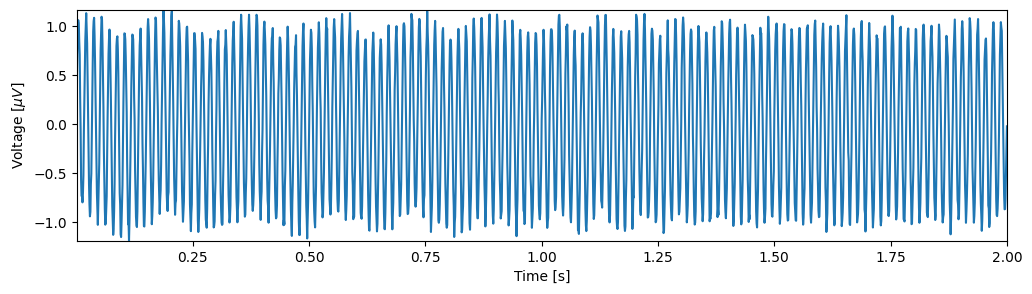

In [3]:
## First, we inspect the data in the time domain

data = loadmat('/Users/guysinger/Desktop/BSA-2023/week-2/EEG-Signal-Homework.mat')  # Load the EEG data
EEG = data['EEG'][:, 0]                 # Extract the EEG variable
t = data['t'][0]                        # Extract the time variable

plot(t, EEG)                            # Plot the data in the time domain
xlabel('Time [s]')                      # Label the time axis
ylabel('Voltage [$\mu V$]')             # Label the voltage axis
autoscale(tight=True)                   # Minimize white space
show()

In our plot, the voltage trace is plotted as a continuous line, but don't be fooled into thinking that the signal has been stored as a continuous signal. If we zoom in on the data, we can see our signal actually consists of discreet data points (shown below). Although the physiological signal being recorded evolves as a continuous signal, we observe discrete samples of this continuous signal. The sampling rate is determined by the EEG recording device used. In this example, the **data is being sampled at 1000Hz, or one sample every 1ms.**

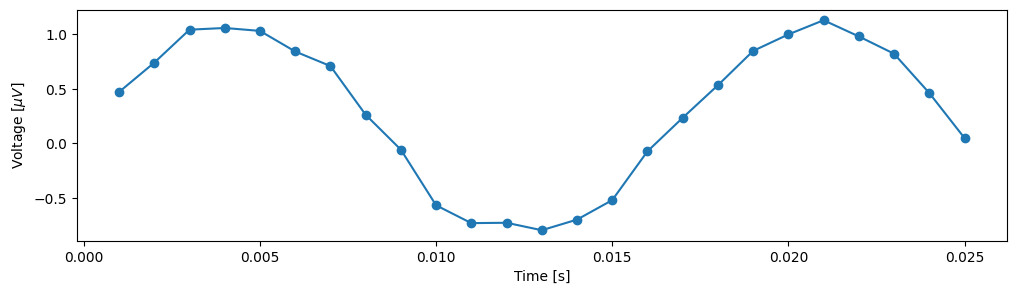

In [4]:
plot(t[:25], EEG[:25], 'o-')    # Plot the first 25 points
xlabel('Time [s]')              # Label the time axis
ylabel('Voltage [$\mu V$]')     # Label the voltage axis
show()